# ABSTRACT:

    En el siguiente trabajo, se realizará análisis de las ventas de la empresa Amazon, en donde se desarrollará el análisis de la siguiente hipotesis:
    -Durante el año 2020 y 2021, el genero femenino y masculino tuvieron comportamientos de compras distintos.
    
    Para esto se realizará  un análisis de conjunto de datos de 35 columnas y 286.391 registros sobre ventas de la empresa Amazon durante el año 2020 y 2021, en donde en el data set podemos encontrar tanto información de la transacción de venta como del cliente que compró el producto.
    A continuación se buscará analizar los datos anteriormente mencionados, a traves del lenguaje de programación Python utilizando librerias Pandas, Seaborn, Plotly y Scikit_learn. También se utilizarán instrumentos tantos estadisticos, de clistering y modelos de series de tiempo para el analisis de los datos antes mencionados.
    
    Finalmente, tras realizar análisis de los datos presentados, se puede dar cuenta que el genero femenino y masculino poseen una distribución etaria similar, sus compras por categoría se diferencias en la 3era diferencia donde femenino decide comprar Men's Fashion mientras el masculino Superstore y por ultimo, existe evidencia estadistica significativa en relacion al gasto monetario entre el genero femenino y masculino.
    

# Motivación:
            La motivación para el siguiente trabajo es poder aplicar nuevos conocimientos adquiridos de data Science dentro del mundo del retail que es donde me desempeño laboralmente para así posteriormente poder aplicar estos conocimientos dentro de la empresa en la cual me encuentro trabajando actualmente

# Audiencia:
    Este análisis esta dirigido para alguien que pueda tomar decisiones dentro de Amazon, ya sea un jefe comercial, subgerente o gerente comercial o de ecommerce, para que así puedan tomar este análisis de las ventas del ecommerce en el año 2020 y 2021, y crear estrategias enfocadas en los distintos tipos de clientes esperando incrementar la adherencia a compras dentro la pagina de Amazon.
    

# Contexto comercial:
    En el año 2020 y 2021, la empresa Amazon se encontraba en un contexto de pandemia en donde se incrementaron notablemente las ventas de los canales online de ecommerce.
    

# Problema comercial:
    El problema luego del exito de ventas online del año 2020 y 2021 radica en que al darse por acabada la pandemia las ventas online decrecieron por lo que se deben generar nuevas estrategias comerciales para incrementar las ventas y también lograr incrementar la adherencia de los clientes  al canal online de Amazon pos pandemia.
    

# Contexto analítico:
    Se obtuvo un set de datos de las ventas de la empresa Amazon en el año 2020 y 2021, el cual consta de 35 columnas y de 286.391 registros los cuales serán analizados por medio de un Jupyther notebook en lenguaje Python.
    Para el análisis se realizará primero una revisión de consistencia del set de datos, luego un análisis exploratorio EDA y finalmente se implementarán algoritmos de machine learning de clustering para revisar y detallar distintos comportamientos de ventas.
        

In [ ]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
#Cargamos dataset

from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
os.chdir("/content/gdrive/My Drive/AA Curso Ciencia de datos")
csv_sales = "Amazon Sales FY2020-21.csv"
pd.options.display.max_columns = None
df= pd.read_csv(csv_sales,sep=',' , low_memory= False)
df.tail(100)


Mounted at /content/gdrive


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
286292,100562221,29/09/2021,cod,904909,KABEAS5AB0CFA7C4005,2,31.9,31.9,0.0,31.9,Kids & Baby,cod,Valid,115280,2021,Sep-21,633456,Mr.,Emile,N,Row,M,37,"Row, Emile",emile.row@cox.net,4/15/2017,225-921-1113,Barksdale Afb,Bossier,Barksdale Afb,LA,71110,South,enrow,0.0
286293,100562221,29/09/2021,cod,904910,KABC-T59AD390D2938E-L,2,29.9,29.9,0.0,29.9,Kids & Baby,cod,Valid,115280,2021,Sep-21,633456,Mr.,Emile,N,Row,M,37,"Row, Emile",emile.row@cox.net,4/15/2017,225-921-1113,Barksdale Afb,Bossier,Barksdale Afb,LA,71110,South,enrow,0.0
286294,100562221,29/09/2021,cod,904912,KABC-T5A744C2B38C39-L,2,18.5,18.5,0.0,18.5,Kids & Baby,cod,Valid,115280,2021,Sep-21,633456,Mr.,Emile,N,Row,M,37,"Row, Emile",emile.row@cox.net,4/15/2017,225-921-1113,Barksdale Afb,Bossier,Barksdale Afb,LA,71110,South,enrow,0.0
286295,100562221,29/09/2021,cod,904914,KABBIN5A93DFCF65A3B-7-8 Years,2,39.9,39.9,0.0,39.9,Kids & Baby,cod,Valid,115280,2021,Sep-21,633456,Mr.,Emile,N,Row,M,37,"Row, Emile",emile.row@cox.net,4/15/2017,225-921-1113,Barksdale Afb,Bossier,Barksdale Afb,LA,71110,South,enrow,0.0
286296,100562222,29/09/2021,cod,904916,COMTOO59D5164EE7D18,3,0.0,0.0,0.0,0.0,Computing,cod,Valid,115281,2021,Sep-21,244849,Drs.,Audry,U,Overly,F,62,"Overly, Audry",audry.overly@gmail.com,6/16/1999,480-350-0995,Scottsdale,Maricopa,Scottsdale,AZ,85267,West,auoverly,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286387,100562365,30/09/2021,paid,905179,APPCHA5AF14939B8F8A,2,4419.9,4419.9,0.0,4419.9,Appliances,Easypay,Valid,115323,2021,Sep-21,967309,Prof.,Brady,K,Latham,M,51,"Latham, Brady",brady.latham@gmail.com,3/21/2007,212-772-7404,Rushville,Yates,Rushville,NY,14544,Northeast,bklatham,0.0
286388,100562376,30/09/2021,cod,905191,MEFCOT5A8D1E973B886,2,39.9,39.9,0.0,39.9,Men's Fashion,cod,Valid,115324,2021,Sep-21,335358,Prof.,Bennie,M,Brunetti,M,52,"Brunetti, Bennie",bennie.brunetti@gmail.com,10/24/2011,229-817-9451,Lawrenceville,Gwinnett,Lawrenceville,GA,30044,South,bmbrunetti,0.0
286389,100562383,30/09/2021,cod,905200,WOFVAL59D5EA84167F9-M,2,40.0,40.0,0.0,40.0,Women's Fashion,cod,Valid,115325,2021,Sep-21,675384,Mrs.,Francesca,N,Giusti,F,38,"Giusti, Francesca",francesca.giusti@btinternet.com,7/25/1987,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0
286390,100562384,30/09/2021,cod,905202,WOFNIG5B4D7EB0E9FDD-L,2,49.9,49.9,0.0,49.9,Women's Fashion,cod,Valid,115325,2021,Sep-21,675384,Mrs.,Francesca,N,Giusti,F,38,"Giusti, Francesca",francesca.giusti@btinternet.com,7/25/1987,252-414-8396,Durham,Durham,Durham,NC,27701,South,fngiusti,0.0


# Hipotesis:


Los hombres y mujeres tuvieron comportamientos de compras distintos en amazon en los años 2020 y 2021.

#Exploración del data set

In [ ]:
df['category'].unique()

array(["Men's Fashion", 'Mobiles & Tablets', 'Computing', 'Appliances',
       'Home & Living', "Women's Fashion", 'Health & Sports',
       'Beauty & Grooming', 'Superstore', 'Others', 'Entertainment',
       'Soghaat', 'Kids & Baby', 'Books', 'School & Education'],
      dtype=object)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_id,286392.0,741664.902131,95746.031827,574769.0,659684.50,742309.00,826124.25000,905208.00
qty_ordered,286392.0,3.011296,4.573837,1.0,2.00,2.00,3.00000,501.00
price,286392.0,851.385253,1741.750751,0.0,49.90,119.00,950.00000,101262.59
value,286392.0,885.879934,2073.252179,0.0,49.90,158.97,910.00000,101262.59
discount_amount,286392.0,70.039427,256.880870,0.0,0.00,0.00,18.38305,30213.15
total,286392.0,815.840507,1983.580302,0.0,49.90,149.80,800.00000,101262.59
cust_id,286392.0,70048.019054,30243.856395,4.0,56519.00,74225.50,92357.00000,115326.00
year,286392.0,2020.618778,0.485688,2020.0,2020.00,2021.00,2021.00000,2021.00
ref_num,286392.0,560853.663395,255828.418398,111127.0,341265.00,564857.00,781086.00000,999981.00
age,286392.0,46.489033,16.673288,18.0,32.00,47.00,61.00000,75.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

No hay valores nulos dentro del data set.

In [ ]:
df.shape

(286392, 35)

### Exploración de datos:
Hipotesis nula: No hay diferencia estadistica en el comportamiento de compras en relación al valor monetario de la compra entre el genero masculino y femenino en Amazon.
Hipotesis alternativa: existe al menos una diferencia estadistica entre el comportamiento de compras entre genero masculo y femenino

In [ ]:
Gfemenino=df[df.Gender=="F"].total
Gmasculino=df[df.Gender=="M"].total


In [ ]:
statistic, pvalue = stats.ttest_ind(Gfemenino,Gmasculino, equal_var=False)
print('Estadistico:',round(statistic,2),'p-valor:',round(pvalue,5))

Estadistico: 4.27 p-valor: 2e-05


Como p-value es menor al 5% se rechaza hipotesis nula, consecuentemente existen diferencias significativas entre el genero masculino y femenino en relación al valor monetario de la compra.

In [ ]:
Gfemenino.mean(), Gmasculino.mean()

(831.9982316183099, 800.3433096190416)

En promedio el genero femenino gastó 30 pesos más que el genero masculino por SKU.

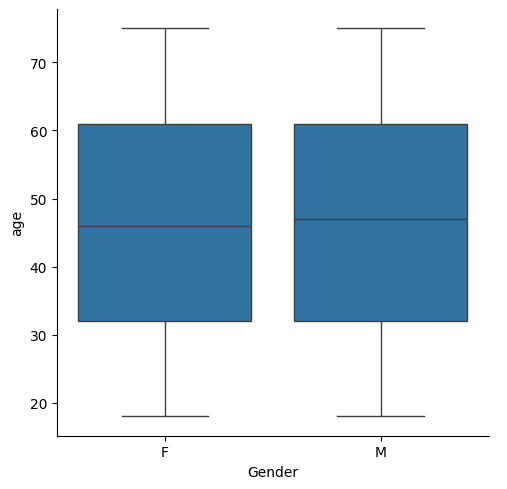

In [ ]:
sns.catplot(data=df, x="Gender", y="age", kind = "box")

En el gráfico anterior podemos dar cuenta que la distribución de edad entre genero femenino y masculino no tiene diferencias significativas en su distribución de cuartiles

In [ ]:
fig = px.scatter(df, x="age", y="total", color="Gender")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

En el gráfico anterior podemos dar cuenta que el genero femenino invierte notablemente más que el masculino

In [ ]:
fig = px.sunburst(df, path=["Gender", "category"], values="qty_ordered")
fig.show()


En el gráfico anterior podemos dar cuenta que la venta por categoría se estructura de la misma forma tanto para el género femenino como para el masculino

In [ ]:
fig = px.sunburst(df, path=["Gender", "category"], values="total")
fig.show()

En el gráfico anterior podemos dar cuenta que tanto el genero femenino como masculino distribuye de igual forma el dinero invertido por categoría

In [ ]:
fig = px.scatter(df, x="age", y="discount_amount", color="Gender")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

En el gráfico anterior podemos dar cuenta que el genero femenino tiende a generar compras con descuentos mayores al genero masculino.

Finalmente, en relación a comportamientos de compra del genero femenino y masculino podemos concluir que aunque poseen una distribución etarea similar, estos poseen comportamientos de compras distintos en donde el genero femenino realiza compras con valores mayores y también busca alcanzar valores de descuentos más altos. Además, en relación a la cantidad de artículos que compra difieren en que en la tercera preferencia en relación a cantidad genero femenino prefiere Men's Fashion mientras el masculino Superstore.

### Recomendación:
    

Tras el análisis previo se recomienda realizar algoritmos de clustering mediante machine learning para poder describir de manera detallada cada grupo de clientes y así poder realizar campañas comerciales buscando mayor adherencia a cada grupo.

#Revisión de nulos

In [ ]:
df.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Sign in date        0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

###No hay nulos en el dataframe

#Análisis bivariado

In [ ]:
df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [ ]:
df2 = df.drop(['order_date','price','value','County','City','State','Region','sku','User Name','Zip','E Mail', 'Sign in date', 'Last Name', 'Middle Initial', 'First Name', 'cust_id', 'item_id', 'ref_num', 'Phone No. ', 'Place Name' ,'full_name','bi_st','year','month','Name Prefix','status','Discount_Percent'], axis = 1)
df2.columns #Se eliminan columnas que no aportan información útil según nuestro objetivo

Index(['order_id', 'qty_ordered', 'discount_amount', 'total', 'category',
       'payment_method', 'Gender', 'age'],
      dtype='object')

In [ ]:
df2.head(10)

,order_id,qty_ordered,discount_amount,total,category,payment_method,Gender,age
0,100354678,21,0.0,1798.0,Men's Fashion,cod,F,43
1,100354678,11,0.0,190.0,Men's Fashion,cod,F,43
2,100354680,9,0.0,1199.2,Men's Fashion,cod,F,43
3,100354680,9,0.0,639.2,Men's Fashion,cod,F,43
4,100367357,2,0.0,99.9,Men's Fashion,cod,F,43
5,100367357,2,0.0,39.9,Men's Fashion,cod,F,43
6,100367360,2,0.0,47.6,Mobiles & Tablets,cod,F,43
7,100354677,2,0.0,49.0,Mobiles & Tablets,Payaxis,M,28
8,100354677,2,0.0,135.0,Computing,Payaxis,M,28
9,100354677,2,0.0,549.9,Appliances,Payaxis,M,28


In [ ]:
df2.insert(5, "value_unit", df2['total']/ df2['qty_ordered'], allow_duplicates=True) # se añade columna calculada.

In [ ]:
df2.head()

,order_id,qty_ordered,discount_amount,total,category,value_unit,payment_method,Gender,age
0,100354678,21,0.0,1798.0,Men's Fashion,85.619048,cod,F,43
1,100354678,11,0.0,190.0,Men's Fashion,17.272727,cod,F,43
2,100354680,9,0.0,1199.2,Men's Fashion,133.244444,cod,F,43
3,100354680,9,0.0,639.2,Men's Fashion,71.022222,cod,F,43
4,100367357,2,0.0,99.9,Men's Fashion,49.950000,cod,F,43


In [ ]:
# Guardamos N° de pedido y categoricas del documento en un dataset
dfCategoricas = df2.drop(['qty_ordered','discount_amount','total','category','value_unit'], axis = 1) #Se elimina category dado que es un valor por línea
dfCategoricas.head()

,order_id,payment_method,Gender,age
0,100354678,cod,F,43
1,100354678,cod,F,43
2,100354680,cod,F,43
3,100354680,cod,F,43
4,100367357,cod,F,43


In [ ]:
#Obtenemos valores sumados por order_id
dfgroupby = df2.drop(['category','payment_method','Gender','age'],axis = 1) # dejamos solo variables númericas


#Agrupamos por orden
dfgroupby2 = dfgroupby.groupby('order_id') \
       .agg({'qty_ordered':'sum', 'discount_amount':'sum', 'total':'sum', 'value_unit':'mean'}) \
       .rename(columns={'qty_ordered':'qty_order','discount_amount':'discount_amount_order','total':'total_order','value_unit':'value_unit_order_mean'}) \
       .reset_index()


dfgroupby2['value_unit_order_mean'] = round(dfgroupby2['value_unit_order_mean'],2)  # limitamos los decimales
dfgroupby2.head()

,order_id,qty_order,discount_amount_order,total_order,value_unit_order_mean
0,100354677,6,0.0,733.9,122.32
1,100354678,32,0.0,1988.0,51.45
2,100354679,4,0.0,306.5,76.62
3,100354680,18,0.0,1838.4,102.13
4,100354681,2,0.0,1099.9,549.95


In [ ]:
#Unimos groupby con categoricas por orden
df3 = dfgroupby2.merge(dfCategoricas, how='left', on= 'order_id')

df3.head()

,order_id,qty_order,discount_amount_order,total_order,value_unit_order_mean,payment_method,Gender,age
0,100354677,6,0.0,733.9,122.32,Payaxis,M,28
1,100354677,6,0.0,733.9,122.32,Payaxis,M,28
2,100354677,6,0.0,733.9,122.32,Payaxis,M,28
3,100354678,32,0.0,1988.0,51.45,cod,F,43
4,100354678,32,0.0,1988.0,51.45,cod,F,43


In [ ]:
#Realizamos label encoder en variables categoricas copiando el dataframe a una nueva variable

dfle = df3
LabelEncoder = LabelEncoder()

dfle['payment_method'] = LabelEncoder.fit_transform(dfle['payment_method'])
dfle['Gender'] = LabelEncoder.fit_transform(dfle['Gender'])

dfle.head()

,order_id,qty_order,discount_amount_order,total_order,value_unit_order_mean,payment_method,Gender,age
0,100354677,6,0.0,733.9,122.32,2,1,28
1,100354677,6,0.0,733.9,122.32,2,1,28
2,100354677,6,0.0,733.9,122.32,2,1,28
3,100354678,32,0.0,1988.0,51.45,6,0,43
4,100354678,32,0.0,1988.0,51.45,6,0,43


In [ ]:
#Dropeamos order_id dado que ya no nos aporta información
df4 = dfle.drop ('order_id', axis= 1)

In [ ]:
pd.crosstab(df4.Gender, df4.payment_method, normalize=True)

payment_method,0,1,2,3,4,5,6,7,8,9,10,11,12
Gender,,,,,,,,,,,,,
0,0.121386,0.020605,0.053601,0.002877,0.039956,0.000014,0.173001,0.005737,0.050811,0.000003,0.009955,0.011264,0.000356
1,0.121913,0.019676,0.054813,0.003261,0.040553,0.000017,0.186353,0.007189,0.053113,0.000000,0.011153,0.012022,0.000370


###No se vislumbran tendencias en la relación de metodo de pago por genero

<Axes: >

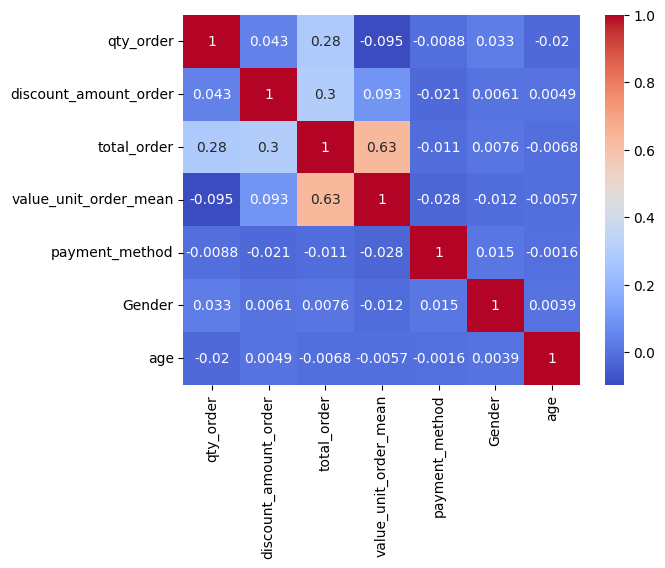

In [ ]:
sns.heatmap(df4.corr(method='pearson'), cmap='coolwarm',annot=True)

###Al revisar la correlación de pearson entre las variables se muestra que el valor promedio de la unidad y total de la orden tienen relación fuerte. Por lo que concluimos que mientras más alto sea el valor unitario, mayor será el valor de la compra.

# Revisión y tratamiento de outliers

In [ ]:
#Utilizamos Z score para este proceso.

dfzscore = df4.apply(zscore)
dfzscore =dfzscore.drop(['payment_method','Gender','age'], axis=1)
dfzscore.head()

,qty_order,discount_amount_order,total_order,value_unit_order_mean
0,-0.130815,-0.131991,-0.134607,-0.276025
1,-0.130815,-0.131991,-0.134607,-0.276025
2,-0.130815,-0.131991,-0.134607,-0.276025
3,0.849120,-0.131991,0.250553,-0.364931
4,0.849120,-0.131991,0.250553,-0.364931


In [ ]:
#Filtramos el data frame con los valores outliers
dfzscore [ (dfzscore['qty_order']> 3) | (dfzscore['discount_amount_order']> 3) | (dfzscore['total_order']> 3) | (dfzscore['value_unit_order_mean']> 3) ].shape

(11843, 4)

### El data set df4 tiene 11.843 registros con outliers

In [ ]:
#Pasamos los indices de los outliers a una lista
indexoutliers = dfzscore [ (dfzscore['qty_order']> 3) | (dfzscore['discount_amount_order']> 3) | (dfzscore['total_order']> 3) | (dfzscore['value_unit_order_mean']> 3) ].index.tolist()

In [ ]:
#Dropeamos los registros con outliers
df5 = df4.drop(index = indexoutliers, axis = 0 )

In [ ]:
#Revisamos número de registros de cada DF
print (len(df4))
print(len(df5))
print(len(df4)- len(df5))

286392
274549
11843


In [ ]:
df5.head()

,qty_order,discount_amount_order,total_order,value_unit_order_mean,payment_method,Gender,age
0,6,0.0,733.9,122.32,2,1,28
1,6,0.0,733.9,122.32,2,1,28
2,6,0.0,733.9,122.32,2,1,28
3,32,0.0,1988.0,51.45,6,0,43
4,32,0.0,1988.0,51.45,6,0,43


# Algoritmos de machine learning


#KMeans


In [ ]:
#elegimos las variables que queremos analizar
X=df5[['qty_order','discount_amount_order','total_order','payment_method','value_unit_order_mean','age']]
X_NEW = pd.get_dummies(X)
Y= df5['Gender']

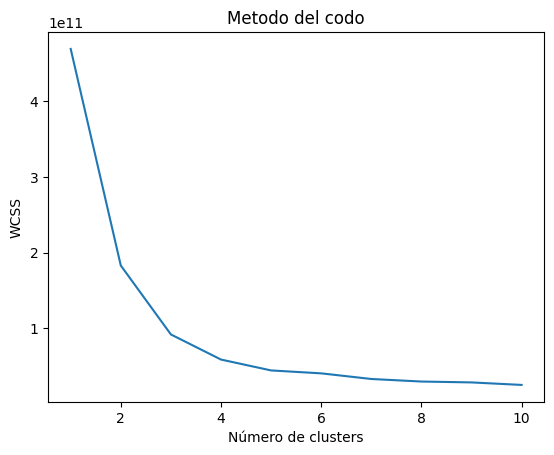

In [ ]:
# Metodo del Codo para encontrar el numero optimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init = 'auto', random_state = 42)
    kmeans.fit(X_NEW)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Creando el k-Means para los 4 grupos encontrados
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X_NEW)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
np.unique(y_kmeans)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
df5['pred']=y_kmeans
df5

,qty_order,discount_amount_order,total_order,value_unit_order_mean,payment_method,Gender,age,pred
0,6,0.0,733.9,122.32,2,1,28,0
1,6,0.0,733.9,122.32,2,1,28,0
2,6,0.0,733.9,122.32,2,1,28,0
3,32,0.0,1988.0,51.45,6,0,43,3
4,32,0.0,1988.0,51.45,6,0,43,3
...,...,...,...,...,...,...,...,...
286384,3,0.0,1352.0,450.67,10,1,59,3
286385,2,0.0,40.0,20.00,6,0,38,0
286386,2,0.0,49.9,24.95,6,0,38,0
286387,2,0.0,69.9,34.95,6,1,59,0


In [ ]:
dfKMeans = df5.groupby(['pred','Gender','payment_method']).mean().sort_values(by=['Gender','pred'])
dfKMeans.head()


qty_order  discount_amount_order  total_order  \
pred Gender payment_method                                                  
0    0      0                6.738093              48.755628   304.633626   
            1                6.215827              24.175835   241.078458   
            2                7.489960              52.925348   331.752621   
            3                4.709984              10.497365   148.956851   
            4                7.044010              24.098933   261.019872   

                            value_unit_order_mean        age  
pred Gender payment_method                                    
0    0      0                           72.346437  46.380542  
            1                           61.283792  45.959851  
            2                           85.305031  46.861981  
            3                           45.638938  48.768621  
            4                           59.690157  46.567848

In [ ]:
#Validación del modelo
print('Silhouette score =',silhouette_score(X, kmeans.fit_predict(X)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score = 0.6803198304501209


In [ ]:
#Aplicamos hipertuning de parametros a kmeans
kmeansHipertuning = KMeans(n_clusters = 5, init = 'k-means++',n_init = 'auto', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeansHipertuning = kmeansHipertuning.fit_predict(X_NEW)


In [ ]:
np.unique(y_kmeansHipertuning)

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
df5['predhipertuning']=y_kmeansHipertuning
df5

,qty_order,discount_amount_order,total_order,value_unit_order_mean,payment_method,Gender,age,pred,predhipertuning
0,6,0.0,733.9,122.32,2,1,28,0,0
1,6,0.0,733.9,122.32,2,1,28,0,0
2,6,0.0,733.9,122.32,2,1,28,0,0
3,32,0.0,1988.0,51.45,6,0,43,3,3
4,32,0.0,1988.0,51.45,6,0,43,3,3
...,...,...,...,...,...,...,...,...,...
286384,3,0.0,1352.0,450.67,10,1,59,3,3
286385,2,0.0,40.0,20.00,6,0,38,0,0
286386,2,0.0,49.9,24.95,6,0,38,0,0
286387,2,0.0,69.9,34.95,6,1,59,0,0


In [ ]:
dfKMeansHipertuning = df5.drop('pred', axis = 1 )
dfKMeansHipertuning = dfKMeansHipertuning.groupby(['predhipertuning','Gender','payment_method']).mean().sort_values(by=['Gender','predhipertuning'])
dfKMeansHipertuning.head()

qty_order  discount_amount_order  \
predhipertuning Gender payment_method                                     
0               0      0                6.588177              40.125399   
                       1                6.254266              22.279778   
                       2                7.319946              43.336333   
                       3                4.756058              10.700868   
                       4                6.027800              17.096291   

                                       total_order  value_unit_order_mean  \
predhipertuning Gender payment_method                                       
0               0      0                262.833782              59.104568   
                       1                221.993775              54.736765   
                       2                280.466847              69.144025   
                       3                137.251976              39.921535   
                       4                226.659831              54.950107   

                                             age  
predhipertuning Gender payment_method             
0               0      0               46.448103  
                       1               45.967796  
                       2               46.853538  
                       3               48.613893  
                       4               46.543489

In [ ]:
#Validación del modelo con hipertuning de parametro
print('Silhouette score =',silhouette_score(X, kmeansHipertuning.fit_predict(X)))

Silhouette score = 0.6383118932339519


El Silhouette score disminuyó desde 0.68 a 0.63 por lo que el hipertuning mejoró el clustering.

In [ ]:
davies_bouldin_scoreKmeans = davies_bouldin_score(X, kmeansHipertuning.fit_predict(X))
print ( 'Davies bouldin score:',davies_bouldin_scoreKmeans)

Davies bouldin score: 0.7731150545549208



# Arbol de decisión

In [ ]:
X = df5.drop('Gender', axis =1)
y=df5['Gender']

In [ ]:
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Arbol de Decision
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42)

In [ ]:
#Fit
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
#Prediccion
y_test_pred = arbol_de_decision.predict(X_test)

In [ ]:
y_test_pred

array([0, 1, 1, ..., 1, 1, 1])

### Evaluación modelo

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[ 3810, 36738],
       [ 3203, 38614]])

In [ ]:
precision_score(y_test, y_test_pred)

0.5124482429132604

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred) #tasa de falsos negativos cercana a 0

0.9234043570796566

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.54      0.09      0.16     40548
           1       0.51      0.92      0.66     41817

    accuracy                           0.52     82365
   macro avg       0.53      0.51      0.41     82365
weighted avg       0.53      0.52      0.41     82365



In [ ]:
print('Silhouette score =',silhouette_score(X, arbol_de_decision.predict(X)))

Silhouette score = -0.08973379517006996


In [ ]:
davies_bouldin_scoreDT = davies_bouldin_score(X, arbol_de_decision.predict(X))
print ( 'Davies bouldin score:',davies_bouldin_scoreDT)

Davies bouldin score: 5.238482254714719


#Conclusión
Tomaremos la clasificación de Kmeans con hipertuning dado que el decision tree posee Silhouette score negativo, lo cual indica un problema en la asignación de clusters. Para lo cual se crearán distintas promociones para los 6 distintos comportamientos de compras

In [ ]:
dfKMeansHipertuning.head()

qty_order  discount_amount_order  \
predhipertuning Gender payment_method                                     
0               0      0                6.588177              40.125399   
                       1                6.254266              22.279778   
                       2                7.319946              43.336333   
                       3                4.756058              10.700868   
                       4                6.027800              17.096291   

                                       total_order  value_unit_order_mean  \
predhipertuning Gender payment_method                                       
0               0      0                262.833782              59.104568   
                       1                221.993775              54.736765   
                       2                280.466847              69.144025   
                       3                137.251976              39.921535   
                       4                226.659831              54.950107   

                                             age  
predhipertuning Gender payment_method             
0               0      0               46.448103  
                       1               45.967796  
                       2               46.853538  
                       3               48.613893  
                       4               46.543489